# Edit and merge molecules in RDKit

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolDrawing, DrawingOptions

In [2]:
DrawingOptions.bondLineWidth=1.8
DrawingOptions.atomLabelFontSize=14
DrawingOptions.includeAtomNumbers=False

Create new molecule from a SMILES string:

In [3]:
start_mol = Chem.MolFromSmiles('c1cc(CCCO)ccc1')

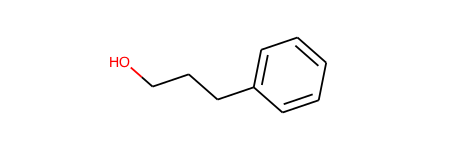

In [4]:
start_mol

Let's try to delete some atoms by matching a simple pattern:

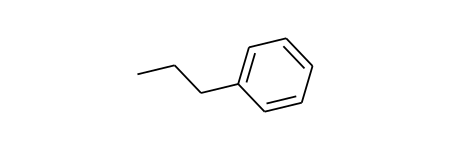

In [5]:
truncate = Chem.DeleteSubstructs(start_mol,Chem.MolFromSmiles('O'))
truncate

Now we will build a fragment that we want to connect:

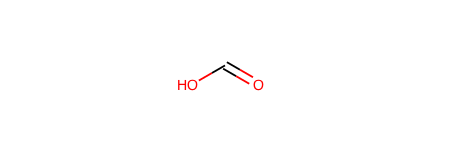

In [6]:
mod = Chem.MolFromSmiles('OC=O')
mod

Combine them into one molecule object:

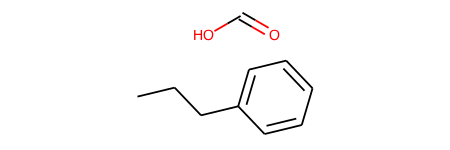

In [7]:
combo = Chem.CombineMols(truncate,mod)
combo

Here the molecules are merged into a single molecule object, but are still separate fragments. Let's see what this looks like in a SMILES string:

In [8]:
Chem.MolToSmiles(combo)

'CCCc1ccccc1.O=CO'

The period (`.`) indicates that the molecule contains two unbonded fragments. No such obvious distinction appears in the connection table: 

In [9]:
print Chem.MolToMolBlock(combo)


     RDKit          

 12 11  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  1  0
  4  5  1  0
  5  6  1  0
  3  7  2  0
  7  8  1  0
  8  9

One way to stitch these together is to make an editable copy of the molecule object, add a bond between atoms by giving the two indices of atoms to be bonded, and then turning this back into a "normal" molecule object. Note that indices are zero indexed even though the are 1-indexed in the mol block above

In [10]:
edcombo = Chem.EditableMol(combo)
DrawingOptions.includeAtomNumbers=True

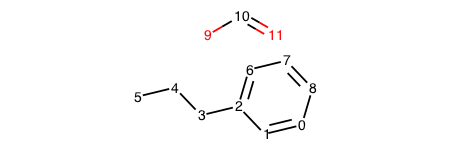

In [11]:
combo

In [12]:
edcombo.AddBond(5,10,order=Chem.rdchem.BondType.SINGLE)

12

Before we can do much of anything to our newly joined molecule, we need to copy the information back into a "normal" molecule object.

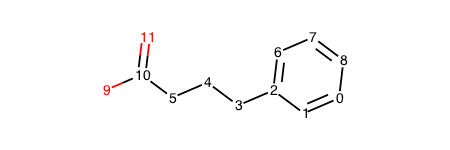

In [13]:
back = edcombo.GetMol()
back

## Replacing one substructure with another

If our reason to stitch two molecules together, as in the example above, it is easier to use RDKit to replace one functional group in the molecule with another.

In [14]:
DrawingOptions.includeAtomNumbers=False

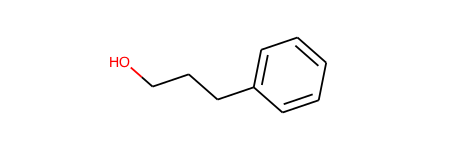

In [15]:
start_mol

In [16]:
mod_mol = Chem.ReplaceSubstructs(start_mol, 
                                 Chem.MolFromSmiles('CO'), 
                                 Chem.MolFromSmiles('C(=O)O'),
                                 replaceAll=True)

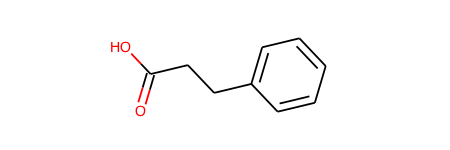

In [19]:
mod_mol[0]

We can start to see how RDKit will be useful for handling chemical reactions.